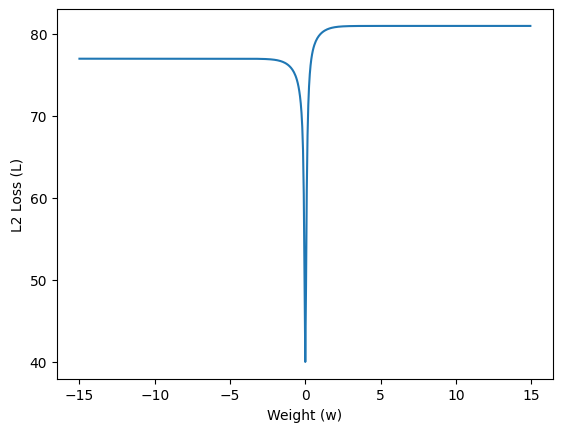

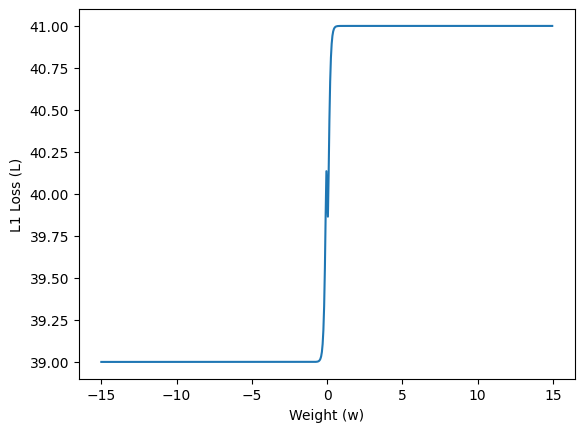

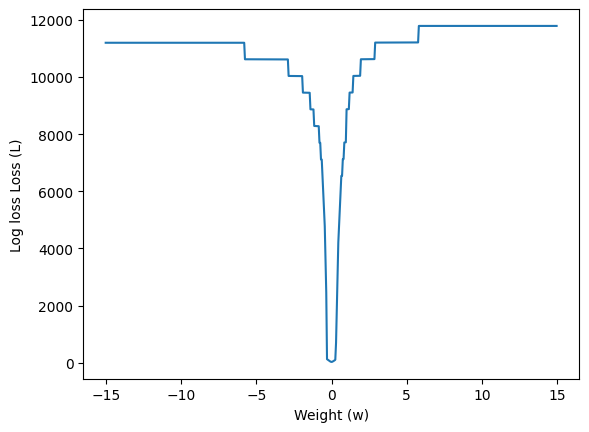

In [174]:
# An analysis of log loss function
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification


def get_loss(w, X, Y, loss_function):
    loss = 0
    for (x, y) in zip(X,Y):
        x_val = Value(x, label='x')
        w_val = Value(w, label='w')
        prediction = math.tanh(w*x)
        loss_delta = loss_function(prediction, y)
        loss = loss + loss_delta
    return loss
    
def plot_loss_function(loss_function, loss_function_name):
    # create a list of weights
    w = list(np.arange(-15, 15, 0.05))
    # get the loss  corresponding to that weight based on the loss function
    L = [get_loss(x, X, Y, loss_function) for x in w]
    
    fig, ax = plt.subplots()
    ax.plot(w, L)
    ax.set_xlabel("Weight (w)")
    ax.set_ylabel(f"{loss_function_name} Loss (L)")
  

# define L2 loss
def L2(prediction, y):
    return (prediction - y) ** 2
    
# define L1 Loss
def L1(prediction, y):
    return abs(prediction - y)

# define log loss
def log_loss(prediction, y):
    f1 = lambda x: (1 + x) / 2.0
    f2 = lambda x: (1 - x) / 2.0
    pred1 = replace_zero(f1(prediction))
    pred2 = replace_zero(f2(prediction))
    return -(f1(y) * math.log(pred1) + f2(y) * math.log(pred2))


def replace_zero(value):
    if abs(value - 0) < 0.00001:
        return 1e-256
    return value

X = list(range(-20, 20, 1))
Y = [-1 if random.random() < 0.1 else 1 for x in X]

# L2 loss is not a convex function
plot_loss_function(L2, "L2")

# L1 loss is not a convex function
plot_loss_function(L1, "L1")

# log loss is not a convex function
plot_loss_function(log_loss, "Log loss")


